<a href="https://colab.research.google.com/github/rickylukman/Machine-Learning/blob/master/Machine_Learning_Alvianda_Ricky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import File dari gdrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd

#read data gdrive disimpan di variable df
df=pd.read_csv('gdrive/My Drive/used_cars.csv')
df.shape

(20001, 26)

In [0]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


# Missing Value

In [0]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


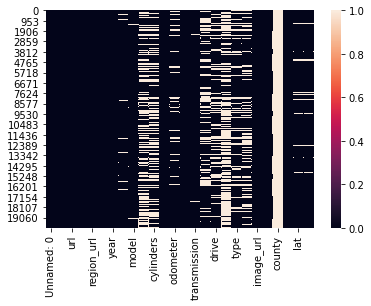

In [0]:
import seaborn as sns
ax = sns.heatmap(df.isna())

In [0]:
# Melihat jumlah data setiap kolom
print(df.isnull().sum())

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64


**Menghapus kolom yang tidak diperlukan**

In [0]:
df = df.drop(["Unnamed: 0","id","url", "region","region_url","cylinders","odometer","vin","size","type","image_url","description","county","lat","long"], axis = 1)

In [0]:
df.shape

(20001, 11)

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,17899,2012.0,volkswagen,golf r,excellent,gas,clean,manual,4wd,black,ut
1,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
2,46463,2015.0,gmc,sierra 1500,excellent,gas,clean,automatic,4wd,white,ut
3,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
4,49999,2018.0,ford,f-450,NaN,diesel,clean,automatic,4wd,white,ut


**Cek data kosong/null**

In [0]:
df[df.isnull().any(axis=1)]

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
1,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
3,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
4,49999,2018.0,ford,f-450,NaN,diesel,clean,automatic,4wd,white,ut
5,13999,2009.0,ram,NaN,NaN,gas,clean,automatic,4wd,silver,ut
6,34500,2017.0,ford,f-350,NaN,diesel,clean,automatic,4wd,white,ut
...,...,...,...,...,...,...,...,...,...,...,...
19996,49999,2016.0,ram,cummin 2500 laramie,NaN,diesel,clean,automatic,4wd,grey,wa
19997,12127,2018.0,nissan,sentra,NaN,gas,clean,automatic,fwd,NaN,wa
19998,0,2019.0,jeep,grand cherokee limited,NaN,gas,clean,automatic,4wd,NaN,wa
19999,14661,2017.0,toyota,corolla,NaN,gas,clean,automatic,fwd,NaN,wa


In [0]:
# Jumlah data kosong untuk setiap kolom
print(df.isnull().sum())

price              0
year              12
manufacturer     705
model            265
condition       9152
fuel              73
title_status     110
transmission     190
drive           4642
paint_color     5514
state              0
dtype: int64


In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
paint_color      object
state            object
dtype: object

**Handling missing value untuk type int dan float**



In [0]:
# Untuk Missing value bertipe int dan float, mengisinya dengan mean (rata-rata) nilai
df.year.fillna(df.year.mean(),inplace=True)

In [0]:
df.describe()

,price,year
count,2.000100e+04,20001.000000
mean,7.664058e+04,2009.830657
std,8.335762e+06,7.911238
min,0.000000e+00,1917.000000
25%,3.970000e+03,2007.000000
50%,8.795000e+03,2011.000000
75%,1.749500e+04,2015.000000
max,1.172420e+09,2020.000000


**Handling missing value untuk type object**

In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
paint_color      object
state            object
dtype: object

In [0]:
print(len(df['manufacturer'].unique()))
# df.manufacturer.value_counts()
df["manufacturer"].fillna("ford", inplace = True)

41


In [0]:
print(len(df['model'].unique()))
# df.model.value_counts()
df["model"].fillna("f-150", inplace = True)

4145


In [0]:
print(len(df['condition'].unique()))
# df.condition.value_counts()
df["condition"].fillna("excellent", inplace = True)

7


In [0]:
print(len(df['fuel'].unique()))
# df.fuel.value_counts()
df["fuel"].fillna("gas", inplace = True)

6


In [0]:
print(len(df['title_status'].unique()))
# df.title_status.value_counts()
df["title_status"].fillna("clean", inplace = True)

7


In [0]:
print(len(df['transmission'].unique()))
df.transmission.value_counts()
df["transmission"].fillna("automatic", inplace = True)

4


In [0]:
print(len(df['drive'].unique()))
# df.drive.value_counts()
df["drive"].fillna("4wd", inplace = True)

4


In [0]:
print(len(df['paint_color'].unique()))
# df.paint_color.value_counts()
df["paint_color"].fillna("white", inplace = True)

13


In [0]:
print(df.isnull().sum())

price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
title_status    0
transmission    0
drive           0
paint_color     0
state           0
dtype: int64


In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
paint_color      object
state            object
dtype: object

# Encode object to int/float

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
df['manufacturer'] = encoder.fit_transform(df['manufacturer'])
df['model'] = encoder.fit_transform(df['model'])
df['condition'] = encoder.fit_transform(df['condition'])
df['fuel'] = encoder.fit_transform(df['fuel'])
df['title_status'] = encoder.fit_transform(df['title_status'])
df['transmission'] = encoder.fit_transform(df['transmission'])
df['drive'] = encoder.fit_transform(df['drive'])
df['paint_color'] = encoder.fit_transform(df['paint_color'])
df['state'] = encoder.fit_transform(df['state'])

In [0]:
df.dtypes

price             int64
year            float64
manufacturer      int64
model             int64
condition         int64
fuel              int64
title_status      int64
transmission      int64
drive             int64
paint_color       int64
state             int64
dtype: object

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,17899,2012.0,38,2197,0,2,0,1,0,0,0
1,0,2016.0,12,1764,0,2,0,0,0,10,0
2,46463,2015.0,13,3285,0,2,0,0,0,10,0
3,0,2016.0,12,1764,0,2,0,0,0,10,0
4,49999,2018.0,12,1843,0,0,0,0,0,10,0


# Outlier

<Figure size 10000x10000 with 0 Axes>

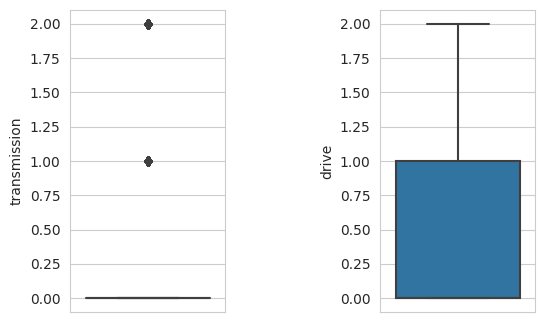

In [0]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["transmission"], ax=axes[0])
sns.boxplot(y=df["drive"], ax=axes[1])
plt.subplots_adjust(wspace=1)

# Scalling

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,17899,2012.0,38,2197,0,2,0,1,0,0,0
1,0,2016.0,12,1764,0,2,0,0,0,10,0
2,46463,2015.0,13,3285,0,2,0,0,0,10,0
3,0,2016.0,12,1764,0,2,0,0,0,10,0
4,49999,2018.0,12,1843,0,0,0,0,0,10,0


In [0]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = ['price','year','manufacturer','model','condition','fuel','title_status','transmission','drive','paint_color','state']
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,0.000015,0.922330,0.974359,0.530292,0.0,0.5,0.0,0.5,0.0,0.000000,0.0
1,0.000000,0.961165,0.307692,0.425778,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
2,0.000040,0.951456,0.333333,0.792904,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
3,0.000000,0.961165,0.307692,0.425778,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
4,0.000043,0.980583,0.307692,0.444847,0.0,0.0,0.0,0.0,0.0,0.909091,0.0


# Korelasi antar data


In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

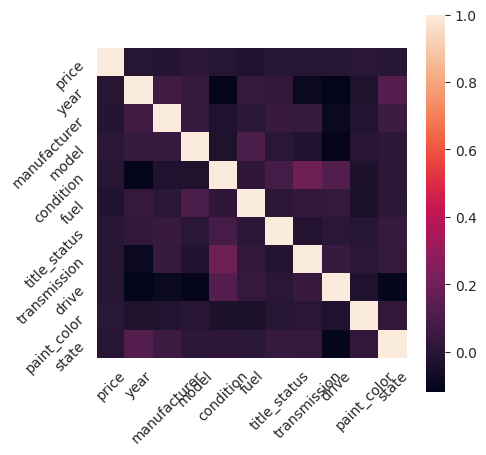

In [0]:
ambil = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
plt.figure(figsize=(5, 5))
ax = sns.heatmap(ambil, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [0]:
ambil

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
price,1.000000,-0.004382,-0.006752,0.008235,-0.004444,-0.020615,-0.001208,-0.002562,-0.003459,0.004747,-0.003147
year,-0.004382,1.000000,0.069177,0.042713,-0.109740,0.036020,0.025964,-0.085660,-0.118948,-0.030790,0.122458
manufacturer,-0.006752,0.069177,1.000000,0.040490,-0.026507,0.006257,0.048211,0.041105,-0.084604,-0.016804,0.063490
model,0.008235,0.042713,0.040490,1.000000,-0.027583,0.101516,0.003933,-0.019052,-0.113513,-0.000919,0.015843
condition,-0.004444,-0.109740,-0.026507,-0.027583,1.000000,0.022454,0.083221,0.194189,0.124757,-0.033624,0.019283
fuel,-0.020615,0.036020,0.006257,0.101516,0.022454,1.000000,0.014437,0.031500,0.038258,-0.041036,0.004221
title_status,-0.001208,0.025964,0.048211,0.003933,0.083221,0.014437,1.000000,-0.010784,0.005105,-0.003638,0.041385
transmission,-0.002562,-0.085660,0.041105,-0.019052,0.194189,0.031500,-0.010784,1.000000,0.048205,0.008149,0.036316
drive,-0.003459,-0.118948,-0.084604,-0.113513,0.124757,0.038258,0.005105,0.048205,1.000000,-0.024032,-0.103944
paint_color,0.004747,-0.030790,-0.016804,-0.000919,-0.033624,-0.041036,-0.003638,0.008149,-0.024032,1.000000,0.026708


# Write to gdrive

In [0]:
df.to_csv('gdrive/My Drive/used_cars_olah.csv')